

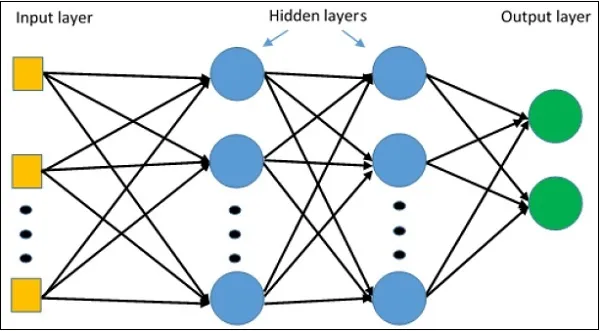


___
# Algoritma **`Multilayer Perceptron`**
___

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('kel5.csv', delimiter = ';')
dataset.head()

,No,gFx,gFy,gFz,Label
0,376,0.009766,-0.017990,-0.998260,TelentangDepan
1,495,0.027023,0.034424,-0.995575,TelentangDepan
2,1130,-0.076700,-0.073300,0.936200,TelentangPutar
3,482,0.045517,0.007553,-1.003113,TelentangDepan
4,1087,-0.077000,0.067200,0.980600,TelentangPutar


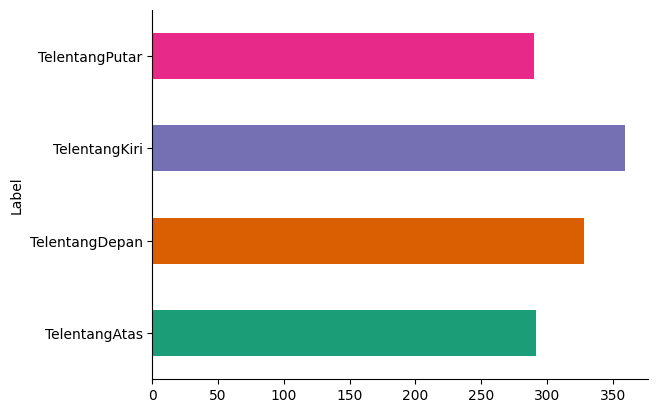

In [ ]:
dataset.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset['Label']=pd.factorize(dataset.Label)[0]
print(dataset)

        No       gFx       gFy       gFz  Label
0      376  0.009766 -0.017990 -0.998260      0
1      495  0.027023  0.034424 -0.995575      0
2     1130 -0.076700 -0.073300  0.936200      1
3      482  0.045517  0.007553 -1.003113      0
4     1087 -0.077000  0.067200  0.980600      1
...    ...       ...       ...       ...    ...
1264  1055 -0.056200  0.030000  0.964500      1
1265  1172 -0.056200  0.020000  1.073200      1
1266   540  0.037399  0.003387 -0.998611      0
1267   270  0.040573 -0.018677 -0.996262      3
1268  1175 -0.014700  0.046900  0.806200      1

[1269 rows x 5 columns]


In [ ]:
x=dataset.drop(['Label'],axis=1)
y=dataset['Label']

scaler = StandardScaler()
scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.7,random_state=42)

In [ ]:
mlp = MLPClassifier(max_iter = 475, hidden_layer_sizes=(100, ), activation ='relu')
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=475)

In [ ]:
pred = mlp.predict(x_test)

Hasil: 
               precision    recall  f1-score   support

           0       0.92      0.71      0.80        97
           1       1.00      1.00      1.00        83
           2       0.76      1.00      0.86        87
           3       1.00      0.95      0.97       114

    accuracy                           0.91       381
   macro avg       0.92      0.91      0.91       381
weighted avg       0.92      0.91      0.91       381



<Axes: >

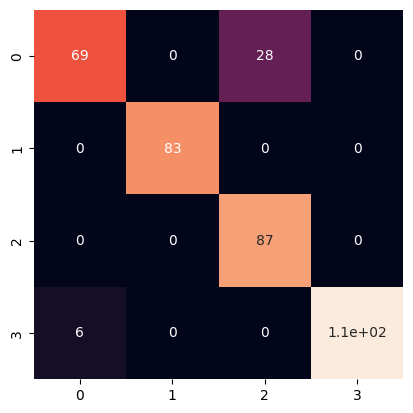

In [ ]:
cm=confusion_matrix(y_test,pred)
print('Hasil: \n', classification_report(y_test,pred))
sns.heatmap(cm, annot=True, cbar=False, square=True)